In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, Imputer, OneHotEncoder, LabelEncoder
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import seaborn as sns
import operator
import math
import tensorflow as tf
from data_science import *

%matplotlib inline

/home/maxime/local/anaconda3/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [6]:
df_all = import_data('data/train.csv', 'data/test.csv', 'VARIABLE_CIBLE', na_values='(MISSING)')

,APP_NB,APP_NB_PAYS,APP_NB_TYPE,BEGIN_MONTH,COUNTRY,FILING_MONTH,FIRST_CLASSE,FISRT_APP_COUNTRY,FISRT_APP_TYPE,FISRT_INV_COUNTRY,...,cited_age_min,cited_age_std,cited_n,cited_nmiss,index_origin,oecd_NB_BACKWARD_NPL,oecd_NB_BACKWARD_PL,oecd_NB_ROOT_CLASSES,pct_NB_IPC,pct_NB_IPC_LY
0,1,1,1,09/1995,US,08/1996,A61K9/48,US,COMPAGNY,GB,...,7665,NaN,NaN,NaN,-1,0.000,0.000000,0.142857,0.965563,0.723658
1,1,1,1,11/1999,DE,11/2000,C08G65/26,DE,COMPAGNY,DE,...,7665,NaN,NaN,NaN,-1,0.000,0.000000,0.200000,0.850490,0.697254
2,1,1,1,06/1992,JP,05/1993,G11B15/07,JP,COMPAGNY,JP,...,256,1188.268558,6,0,-1,0.125,0.785714,0.166667,0.933952,0.821558
3,1,1,1,05/1994,GB,05/1995,F25B41/04,GB,COMPAGNY,GB,...,7665,NaN,NaN,NaN,-1,0.000,0.230769,0.400000,0.520361,0.830949
4,1,1,1,12/1988,DE,11/1989,H01F17/06,DE,COMPAGNY,DE,...,709,1177.332791,2,0,-1,0.000,0.500000,0.200000,1.000000,0.634537


In [7]:
df_all0 = df_all[df_all.SOURCE_CITED_AGE == 'IMPUT']
df_all1 = df_all[df_all.SOURCE_CITED_AGE == 'CALC']

# --------------------------------------------------------------------------------------

In [8]:

date_columns = ['PRIORITY_MONTH', 'FILING_MONTH', 'PUBLICATION_MONTH', 'BEGIN_MONTH']

In [9]:
preproc = Preprocessings(date_columns=date_columns)

df0 = preproc.datetime_processings(df_all0, format='%m/%Y')
df0 = preproc.cat_to_codes(df0)
df0 = df0.fillna(df0.median())

preproc = Preprocessings(date_columns=date_columns)

df1 = preproc.datetime_processings(df_all1, format='%m/%Y')
df1 = preproc.cat_to_codes(df1)
df1 = df1.fillna(df1.median())

/home/maxime/local/anaconda3/lib/python3.4/site-packages/pandas/core/frame.py:2265: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [10]:
df0_train, df0_eval = re_split(df0, 'VARIABLE_CIBLE')
df1_train, df1_eval = re_split(df1, 'VARIABLE_CIBLE')

In [11]:
keep_feat = Used_features('VARIABLE_CIBLE')

print(df0_eval.shape)
df0_eval = keep_feat.fit_transform(df0_eval)
df0_train = keep_feat.transform(df0_train)
print(df0_eval.shape)


print(df1_eval.shape)
df1_eval = keep_feat.fit_transform(df1_eval)
df1_train = keep_feat.transform(df1_train)
print(df1_eval.shape)



(84092, 48)
(84092, 37)
(45623, 48)
(45623, 46)


In [12]:
print(df1_train.columns)
print(df1_eval.columns)


Index(['APP_NB', 'APP_NB_PAYS', 'APP_NB_TYPE', 'COUNTRY', 'FIRST_CLASSE',
       'FISRT_APP_COUNTRY', 'FISRT_APP_TYPE', 'FISRT_INV_COUNTRY',
       'FISRT_INV_TYPE', 'IDX_ORIGIN', 'IDX_RADIC', 'INV_NB', 'INV_NB_PAYS',
       'INV_NB_TYPE', 'LANGUAGE_OF_FILLING', 'MAIN_IPC', 'NB_BACKWARD',
       'NB_BACKWARD_AUTRE', 'NB_BACKWARD_I', 'NB_BACKWARD_NPL',
       'NB_BACKWARD_PL', 'NB_BACKWARD_XY', 'NB_CLASSES', 'NB_FIELDS',
       'NB_ROOT_CLASSES', 'NB_SECTORS', 'SOURCE_BEGIN_MONTH', 'SOURCE_IDX_RAD',
       'TECHNOLOGIE_FIELD', 'TECHNOLOGIE_SECTOR', 'VOIE_DEPOT',
       'cited_age_max', 'cited_age_mean', 'cited_age_median', 'cited_age_min',
       'cited_age_std', 'cited_n', 'index_origin', 'oecd_NB_BACKWARD_NPL',
       'oecd_NB_BACKWARD_PL', 'oecd_NB_ROOT_CLASSES', 'pct_NB_IPC',
       'pct_NB_IPC_LY', 'filing-begin', 'pub-filing', 'pub_year',
       'VARIABLE_CIBLE'],
      dtype='object')
Index(['APP_NB', 'APP_NB_PAYS', 'APP_NB_TYPE', 'COUNTRY', 'FIRST_CLASSE',
       'FISRT_APP_COUN

# GridSearchCV to find a Benchmark model

### on df0

In [60]:
features0 = df0_eval.columns.tolist()
features0.remove('index_origin')

In [15]:
print(features0)
print(features1)

['APP_NB', 'APP_NB_PAYS', 'APP_NB_TYPE', 'COUNTRY', 'FIRST_CLASSE', 'FISRT_APP_COUNTRY', 'FISRT_APP_TYPE', 'FISRT_INV_COUNTRY', 'FISRT_INV_TYPE', 'INV_NB', 'INV_NB_PAYS', 'INV_NB_TYPE', 'LANGUAGE_OF_FILLING', 'MAIN_IPC', 'NB_BACKWARD', 'NB_BACKWARD_AUTRE', 'NB_BACKWARD_I', 'NB_BACKWARD_NPL', 'NB_BACKWARD_PL', 'NB_BACKWARD_XY', 'NB_CLASSES', 'NB_FIELDS', 'NB_ROOT_CLASSES', 'NB_SECTORS', 'SOURCE_BEGIN_MONTH', 'TECHNOLOGIE_FIELD', 'TECHNOLOGIE_SECTOR', 'VOIE_DEPOT', 'oecd_NB_BACKWARD_NPL', 'oecd_NB_BACKWARD_PL', 'oecd_NB_ROOT_CLASSES', 'pct_NB_IPC', 'pct_NB_IPC_LY', 'filing-begin', 'pub-filing', 'pub_year']
['APP_NB', 'APP_NB_PAYS', 'APP_NB_TYPE', 'COUNTRY', 'FIRST_CLASSE', 'FISRT_APP_COUNTRY', 'FISRT_APP_TYPE', 'FISRT_INV_COUNTRY', 'FISRT_INV_TYPE', 'IDX_ORIGIN', 'IDX_RADIC', 'INV_NB', 'INV_NB_PAYS', 'INV_NB_TYPE', 'LANGUAGE_OF_FILLING', 'MAIN_IPC', 'NB_BACKWARD', 'NB_BACKWARD_AUTRE', 'NB_BACKWARD_I', 'NB_BACKWARD_NPL', 'NB_BACKWARD_PL', 'NB_BACKWARD_XY', 'NB_CLASSES', 'NB_FIELDS', 'NB_R

In [16]:
params = {'n_estimators':np.arange(5,1500,100), 'class_weight':[None, 'balanced']}

est = RandomForestClassifier(n_jobs=6, min_samples_split=1, max_depth=None, warm_start=True)

clf0 = GridSearchCV(estimator=est, param_grid=params, verbose=3, scoring='roc_auc')

clf0.fit(df0_train[features0], df0_train['VARIABLE_CIBLE'])

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] n_estimators=5, class_weight=None ...............................
[CV] ...... n_estimators=5, class_weight=None, score=0.609235 -   0.6s
[CV] n_estimators=5, class_weight=None ...............................
[CV] ...... n_estimators=5, class_weight=None, score=0.605209 -   0.6s
[CV] n_estimators=5, class_weight=None ...............................
[CV] ...... n_estimators=5, class_weight=None, score=0.606179 -   0.6s
[CV] n_estimators=105, class_weight=None .............................
[CV] .... n_estimators=105, class_weight=None, score=0.652009 -   7.6s
[CV] n_estimators=105, class_weight=None .............................
[CV] .... n_estimators=105, class_weight=None, score=0.653565 -   7.0s
[CV] n_estimators=105, class_weight=None .............................
[CV] .... n_estimators=105, class_weight=None, score=0.650762 -   7.1s
[CV] n_estimators=205, class_weight=None .............................
[CV] .... n_esti

[Parallel(n_jobs=1)]: Done  31 tasks       | elapsed: 16.9min
/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or "balanced_subsample" are '



[CV] .. n_estimators=5, class_weight=balanced, score=0.606891 -   0.6s
[CV] n_estimators=5, class_weight=balanced ...........................
[CV] .. n_estimators=5, class_weight=balanced, score=0.608913 -   0.6s

/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or "balanced_subsample" are '
/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set targe


[CV] n_estimators=5, class_weight=balanced ...........................
[CV] .. n_estimators=5, class_weight=balanced, score=0.605661 -   0.6s
[CV] n_estimators=105, class_weight=balanced .........................
[CV]  n_estimators=105, class_weight=balanced, score=0.654156 -   7.7s

/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or "balanced_subsample" are '
/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set targe


[CV] n_estimators=105, class_weight=balanced .........................
[CV]  n_estimators=105, class_weight=balanced, score=0.651293 -   7.2s
[CV] n_estimators=105, class_weight=balanced .........................
[CV]  n_estimators=105, class_weight=balanced, score=0.653911 -   7.8s

/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or "balanced_subsample" are '
/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set targe


[CV] n_estimators=205, class_weight=balanced .........................
[CV]  n_estimators=205, class_weight=balanced, score=0.654961 -  14.5s
[CV] n_estimators=205, class_weight=balanced .........................
[CV]  n_estimators=205, class_weight=balanced, score=0.656285 -  15.0s

/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or "balanced_subsample" are '
/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set targe


[CV] n_estimators=205, class_weight=balanced .........................
[CV]  n_estimators=205, class_weight=balanced, score=0.653481 -  14.5s
[CV] n_estimators=305, class_weight=balanced .........................
[CV]  n_estimators=305, class_weight=balanced, score=0.654979 -  22.0s

/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or "balanced_subsample" are '
/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set targe


[CV] n_estimators=305, class_weight=balanced .........................
[CV]  n_estimators=305, class_weight=balanced, score=0.657179 -  20.8s
[CV] n_estimators=305, class_weight=balanced .........................
[CV]  n_estimators=305, class_weight=balanced, score=0.654984 -  21.6s

/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or "balanced_subsample" are '
/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set targe


[CV] n_estimators=405, class_weight=balanced .........................
[CV]  n_estimators=405, class_weight=balanced, score=0.656768 -  27.7s
[CV] n_estimators=405, class_weight=balanced .........................
[CV]  n_estimators=405, class_weight=balanced, score=0.657358 -  28.0s

/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or "balanced_subsample" are '
/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set targe


[CV] n_estimators=405, class_weight=balanced .........................
[CV]  n_estimators=405, class_weight=balanced, score=0.654322 -  29.0s
[CV] n_estimators=505, class_weight=balanced .........................
[CV]  n_estimators=505, class_weight=balanced, score=0.656982 -  35.5s

/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or "balanced_subsample" are '
/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set targe


[CV] n_estimators=505, class_weight=balanced .........................
[CV]  n_estimators=505, class_weight=balanced, score=0.657143 -  35.7s
[CV] n_estimators=505, class_weight=balanced .........................
[CV]  n_estimators=505, class_weight=balanced, score=0.654430 -  35.7s
[CV] n_estimators=605, class_weight=balanced .........................

/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or "balanced_subsample" are '
/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set targe


[CV]  n_estimators=605, class_weight=balanced, score=0.657233 -  40.4s
[CV] n_estimators=605, class_weight=balanced .........................
[CV]  n_estimators=605, class_weight=balanced, score=0.657125 -  41.0s

/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or "balanced_subsample" are '
/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set targe


[CV] n_estimators=605, class_weight=balanced .........................
[CV]  n_estimators=605, class_weight=balanced, score=0.654644 -  44.5s
[CV] n_estimators=705, class_weight=balanced .........................
[CV]  n_estimators=705, class_weight=balanced, score=0.656535 -  49.4s

/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or "balanced_subsample" are '
/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set targe


[CV] n_estimators=705, class_weight=balanced .........................
[CV]  n_estimators=705, class_weight=balanced, score=0.657447 -  50.2s
[CV] n_estimators=705, class_weight=balanced .........................
[CV]  n_estimators=705, class_weight=balanced, score=0.655306 -  49.8s
[CV] n_estimators=805, class_weight=balanced .........................

/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or "balanced_subsample" are '
/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set targe


[CV]  n_estimators=805, class_weight=balanced, score=0.657090 -  57.0s
[CV] n_estimators=805, class_weight=balanced .........................
[CV]  n_estimators=805, class_weight=balanced, score=0.657859 -  57.3s
[CV] n_estimators=805, class_weight=balanced .........................

/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or "balanced_subsample" are '
/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set targe


[CV]  n_estimators=805, class_weight=balanced, score=0.654948 -  56.7s
[CV] n_estimators=905, class_weight=balanced .........................
[CV]  n_estimators=905, class_weight=balanced, score=0.657215 - 1.1min
[CV] n_estimators=905, class_weight=balanced .........................

/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or "balanced_subsample" are '
/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set targe


[CV]  n_estimators=905, class_weight=balanced, score=0.658074 - 1.1min
[CV] n_estimators=905, class_weight=balanced .........................
[CV]  n_estimators=905, class_weight=balanced, score=0.655127 - 1.1min
[CV] n_estimators=1005, class_weight=balanced ........................

/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or "balanced_subsample" are '
/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set targe


[CV]  n_estimators=1005, class_weight=balanced, score=0.656267 - 1.2min
[CV] n_estimators=1005, class_weight=balanced ........................
[CV]  n_estimators=1005, class_weight=balanced, score=0.657644 - 1.2min
[CV] n_estimators=1005, class_weight=balanced ........................

/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or "balanced_subsample" are '
/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set targe


[CV]  n_estimators=1005, class_weight=balanced, score=0.655163 - 1.1min
[CV] n_estimators=1105, class_weight=balanced ........................
[CV]  n_estimators=1105, class_weight=balanced, score=0.657054 - 1.3min
[CV] n_estimators=1105, class_weight=balanced ........................

/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or "balanced_subsample" are '
/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set targe


[CV]  n_estimators=1105, class_weight=balanced, score=0.657859 - 1.3min
[CV] n_estimators=1105, class_weight=balanced ........................
[CV]  n_estimators=1105, class_weight=balanced, score=0.655342 - 1.2min
[CV] n_estimators=1205, class_weight=balanced ........................

/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or "balanced_subsample" are '
/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set targe


[CV]  n_estimators=1205, class_weight=balanced, score=0.657841 - 1.4min
[CV] n_estimators=1205, class_weight=balanced ........................
[CV]  n_estimators=1205, class_weight=balanced, score=0.657537 - 1.4min
[CV] n_estimators=1205, class_weight=balanced ........................

/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or "balanced_subsample" are '
/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set targe


[CV]  n_estimators=1205, class_weight=balanced, score=0.656147 - 1.4min
[CV] n_estimators=1305, class_weight=balanced ........................
[CV]  n_estimators=1305, class_weight=balanced, score=0.657465 - 1.5min
[CV] n_estimators=1305, class_weight=balanced ........................

/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or "balanced_subsample" are '
/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set targe


[CV]  n_estimators=1305, class_weight=balanced, score=0.658753 - 1.5min
[CV] n_estimators=1305, class_weight=balanced ........................
[CV]  n_estimators=1305, class_weight=balanced, score=0.655432 - 1.5min
[CV] n_estimators=1405, class_weight=balanced ........................

/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or "balanced_subsample" are '
/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set targe


[CV]  n_estimators=1405, class_weight=balanced, score=0.657233 - 1.6min
[CV] n_estimators=1405, class_weight=balanced ........................
[CV]  n_estimators=1405, class_weight=balanced, score=0.657090 - 1.6min
[CV] n_estimators=1405, class_weight=balanced ........................

/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or "balanced_subsample" are '
/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set targe


[CV]  n_estimators=1405, class_weight=balanced, score=0.655145 - 1.6min


[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed: 74.8min finished
/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or "balanced_subsample" are '


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=1,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=6,
            oob_score=False, random_state=None, verbose=0, warm_start=True),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': array([   5,  105,  205,  305,  405,  505,  605,  705,  805,  905, 1005,
       1105, 1205, 1305, 1405]), 'class_weight': [None, 'balanced']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=3)

In [18]:
print(clf.best_params_)
print(clf.best_score_)

{'n_estimators': 1305, 'class_weight': 'balanced'}
0.657216802233


Benchmark model : 
 - Tout les features : GridSearchCV results: {'n_estimators': 1305, 'class_weight': 'balanced'}, score (pas roc_auc): 0.657216802233 --roc_auc: ~0.696
 


### on df1

In [13]:
features1 = df1_eval.columns.tolist()
features1.remove('index_origin')

params = {'n_estimators':np.arange(5,1500,100), 'class_weight':[None, 'balanced']}

est = RandomForestClassifier(n_jobs=6, min_samples_split=1, max_depth=None, warm_start=True)

clf1 = GridSearchCV(estimator=est, param_grid=params, verbose=3, scoring='roc_auc')

clf1.fit(df1_train[features1], df1_train['VARIABLE_CIBLE'])

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] class_weight=None, n_estimators=5 ...............................
[CV] ...... class_weight=None, n_estimators=5, score=0.604850 -   0.5s
[CV] class_weight=None, n_estimators=5 ...............................
[CV] ...... class_weight=None, n_estimators=5, score=0.608837 -   0.5s
[CV] class_weight=None, n_estimators=5 ...............................
[CV] ...... class_weight=None, n_estimators=5, score=0.613790 -   0.5s
[CV] class_weight=None, n_estimators=105 .............................
[CV] .... class_weight=None, n_estimators=105, score=0.681772 -   4.8s
[CV] class_weight=None, n_estimators=105 .............................
[CV] .... class_weight=None, n_estimators=105, score=0.682811 -   4.6s
[CV] class_weight=None, n_estimators=105 .............................
[CV] .... class_weight=None, n_estimators=105, score=0.686676 -   4.7s
[CV] class_weight=None, n_estimators=205 .............................
[CV] .... class_

[Parallel(n_jobs=1)]: Done  31 tasks       | elapsed: 10.7min
/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or "balanced_subsample" are '



[CV] class_weight=balanced, n_estimators=5 ...........................
[CV] .. class_weight=balanced, n_estimators=5, score=0.603751 -   0.5s
[CV] class_weight=balanced, n_estimators=5 ...........................
[CV] .. class_weight=balanced, n_estimators=5, score=0.609428 -   0.5s

/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or "balanced_subsample" are '
/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set targe


[CV] class_weight=balanced, n_estimators=5 ...........................
[CV] .. class_weight=balanced, n_estimators=5, score=0.608847 -   0.5s
[CV] class_weight=balanced, n_estimators=105 .........................
[CV]  class_weight=balanced, n_estimators=105, score=0.681871 -   4.7s

/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or "balanced_subsample" are '
/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set targe


[CV] class_weight=balanced, n_estimators=105 .........................
[CV]  class_weight=balanced, n_estimators=105, score=0.680469 -   4.7s
[CV] class_weight=balanced, n_estimators=105 .........................
[CV]  class_weight=balanced, n_estimators=105, score=0.684884 -   4.8s

/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or "balanced_subsample" are '
/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set targe


[CV] class_weight=balanced, n_estimators=205 .........................
[CV]  class_weight=balanced, n_estimators=205, score=0.685239 -   8.8s
[CV] class_weight=balanced, n_estimators=205 .........................
[CV]  class_weight=balanced, n_estimators=205, score=0.687474 -   8.9s

/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or "balanced_subsample" are '
/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set targe


[CV] class_weight=balanced, n_estimators=205 .........................
[CV]  class_weight=balanced, n_estimators=205, score=0.690742 -   8.3s
[CV] class_weight=balanced, n_estimators=305 .........................
[CV]  class_weight=balanced, n_estimators=305, score=0.687616 -  13.1s

/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or "balanced_subsample" are '
/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set targe


[CV] class_weight=balanced, n_estimators=305 .........................
[CV]  class_weight=balanced, n_estimators=305, score=0.687504 -  14.8s
[CV] class_weight=balanced, n_estimators=305 .........................
[CV]  class_weight=balanced, n_estimators=305, score=0.692923 -  12.8s

/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or "balanced_subsample" are '
/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set targe


[CV] class_weight=balanced, n_estimators=405 .........................
[CV]  class_weight=balanced, n_estimators=405, score=0.689166 -  16.7s
[CV] class_weight=balanced, n_estimators=405 .........................
[CV]  class_weight=balanced, n_estimators=405, score=0.688722 -  16.3s

/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or "balanced_subsample" are '
/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set targe


[CV] class_weight=balanced, n_estimators=405 .........................
[CV]  class_weight=balanced, n_estimators=405, score=0.692849 -  16.4s
[CV] class_weight=balanced, n_estimators=505 .........................
[CV]  class_weight=balanced, n_estimators=505, score=0.688017 -  22.7s

/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or "balanced_subsample" are '
/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set targe


[CV] class_weight=balanced, n_estimators=505 .........................
[CV]  class_weight=balanced, n_estimators=505, score=0.689518 -  20.1s
[CV] class_weight=balanced, n_estimators=505 .........................
[CV]  class_weight=balanced, n_estimators=505, score=0.693842 -  20.2s

/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or "balanced_subsample" are '
/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set targe


[CV] class_weight=balanced, n_estimators=605 .........................
[CV]  class_weight=balanced, n_estimators=605, score=0.689390 -  25.9s
[CV] class_weight=balanced, n_estimators=605 .........................
[CV]  class_weight=balanced, n_estimators=605, score=0.689076 -  25.9s

/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or "balanced_subsample" are '
/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set targe


[CV] class_weight=balanced, n_estimators=605 .........................
[CV]  class_weight=balanced, n_estimators=605, score=0.694283 -  24.6s
[CV] class_weight=balanced, n_estimators=705 .........................
[CV]  class_weight=balanced, n_estimators=705, score=0.689572 -  28.8s

/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or "balanced_subsample" are '
/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set targe


[CV] class_weight=balanced, n_estimators=705 .........................
[CV]  class_weight=balanced, n_estimators=705, score=0.689411 -  30.4s
[CV] class_weight=balanced, n_estimators=705 .........................
[CV]  class_weight=balanced, n_estimators=705, score=0.694100 -  28.3s

/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or "balanced_subsample" are '
/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set targe


[CV] class_weight=balanced, n_estimators=805 .........................
[CV]  class_weight=balanced, n_estimators=805, score=0.689803 -  33.8s
[CV] class_weight=balanced, n_estimators=805 .........................
[CV]  class_weight=balanced, n_estimators=805, score=0.690630 -  34.3s

/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or "balanced_subsample" are '
/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set targe


[CV] class_weight=balanced, n_estimators=805 .........................
[CV]  class_weight=balanced, n_estimators=805, score=0.693586 -  33.7s
[CV] class_weight=balanced, n_estimators=905 .........................
[CV]  class_weight=balanced, n_estimators=905, score=0.690984 -  37.6s

/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or "balanced_subsample" are '
/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set targe


[CV] class_weight=balanced, n_estimators=905 .........................
[CV]  class_weight=balanced, n_estimators=905, score=0.689632 -  38.2s
[CV] class_weight=balanced, n_estimators=905 .........................
[CV]  class_weight=balanced, n_estimators=905, score=0.694985 -  39.0s

/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or "balanced_subsample" are '
/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set targe


[CV] class_weight=balanced, n_estimators=1005 ........................
[CV]  class_weight=balanced, n_estimators=1005, score=0.690297 -  44.0s
[CV] class_weight=balanced, n_estimators=1005 ........................
[CV]  class_weight=balanced, n_estimators=1005, score=0.689956 -  43.9s

/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or "balanced_subsample" are '
/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set targe


[CV] class_weight=balanced, n_estimators=1005 ........................
[CV]  class_weight=balanced, n_estimators=1005, score=0.695061 -  42.2s
[CV] class_weight=balanced, n_estimators=1105 ........................
[CV]  class_weight=balanced, n_estimators=1105, score=0.690610 -  45.2s

/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or "balanced_subsample" are '
/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set targe


[CV] class_weight=balanced, n_estimators=1105 ........................
[CV]  class_weight=balanced, n_estimators=1105, score=0.690704 -  44.9s
[CV] class_weight=balanced, n_estimators=1105 ........................
[CV]  class_weight=balanced, n_estimators=1105, score=0.695140 -  45.7s

/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or "balanced_subsample" are '
/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set targe


[CV] class_weight=balanced, n_estimators=1205 ........................
[CV]  class_weight=balanced, n_estimators=1205, score=0.689956 -  50.6s
[CV] class_weight=balanced, n_estimators=1205 ........................
[CV]  class_weight=balanced, n_estimators=1205, score=0.690310 -  50.3s

/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or "balanced_subsample" are '
/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set targe


[CV] class_weight=balanced, n_estimators=1205 ........................
[CV]  class_weight=balanced, n_estimators=1205, score=0.695820 -  52.0s
[CV] class_weight=balanced, n_estimators=1305 ........................
[CV]  class_weight=balanced, n_estimators=1305, score=0.690524 -  53.7s

/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or "balanced_subsample" are '
/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set targe


[CV] class_weight=balanced, n_estimators=1305 ........................
[CV]  class_weight=balanced, n_estimators=1305, score=0.690958 -  55.3s
[CV] class_weight=balanced, n_estimators=1305 ........................
[CV]  class_weight=balanced, n_estimators=1305, score=0.695064 -  55.1s

/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or "balanced_subsample" are '
/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set targe


[CV] class_weight=balanced, n_estimators=1405 ........................
[CV]  class_weight=balanced, n_estimators=1405, score=0.690964 - 1.0min
[CV] class_weight=balanced, n_estimators=1405 ........................
[CV]  class_weight=balanced, n_estimators=1405, score=0.690816 - 1.0min

/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or "balanced_subsample" are '
/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set targe


[CV] class_weight=balanced, n_estimators=1405 ........................
[CV]  class_weight=balanced, n_estimators=1405, score=0.695241 -  58.8s


[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed: 45.5min finished
/home/maxime/local/anaconda3/lib/python3.4/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or "balanced_subsample" are '


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=1,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=6,
            oob_score=False, random_state=None, verbose=0, warm_start=True),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'class_weight': [None, 'balanced'], 'n_estimators': array([   5,  105,  205,  305,  405,  505,  605,  705,  805,  905, 1005,
       1105, 1205, 1305, 1405])},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=3)

In [14]:
print(clf1.best_params_)
print(clf1.best_score_)

{'class_weight': 'balanced', 'n_estimators': 1405}
0.692340130764


Benchmark model : 
 - Tout les features : GridSearchCV results: {'n_estimators': 1405, 'class_weight': 'balanced'}, score roc_auc: 0.692340130764

# Working on features in df0

In [17]:
# Import
test = pd.read_csv('data/test.csv', sep=';', na_values='(MISSING)')
test['VARIABLE_CIBLE'] = 'UNKNOWN'
test['index_origin'] = test.index.tolist()

train = pd.read_csv('data/train.csv', sep=';', na_values='(MISSING)')
train['index_origin'] = -1

piv_train = train.shape[0]

# Creating a DataFrame with train+test data
df_all = pd.concat((train, test), axis=0, ignore_index=True)


df_all0 = df_all[df_all.SOURCE_CITED_AGE == 'IMPUT']

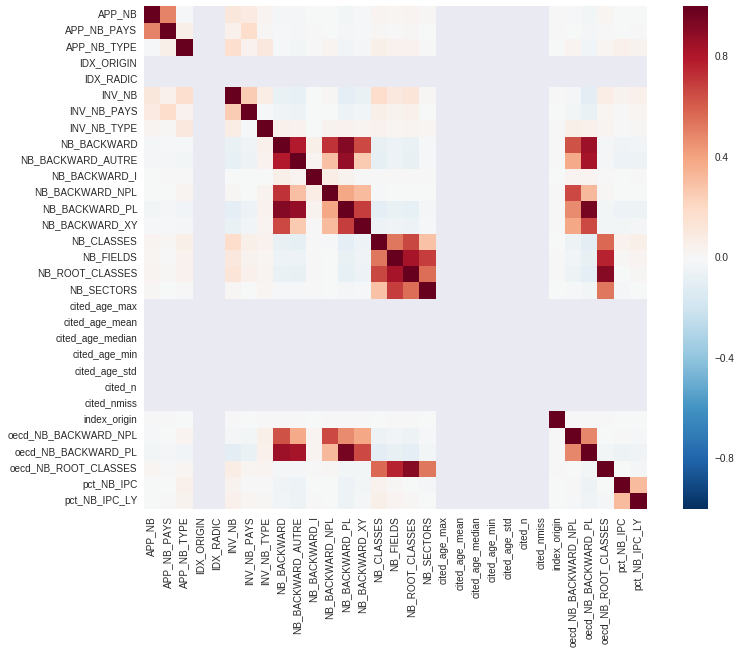

In [19]:
plt.figure(figsize=(13,9))
corr = df_all0.corr()
sns.heatmap(corr, square=True)

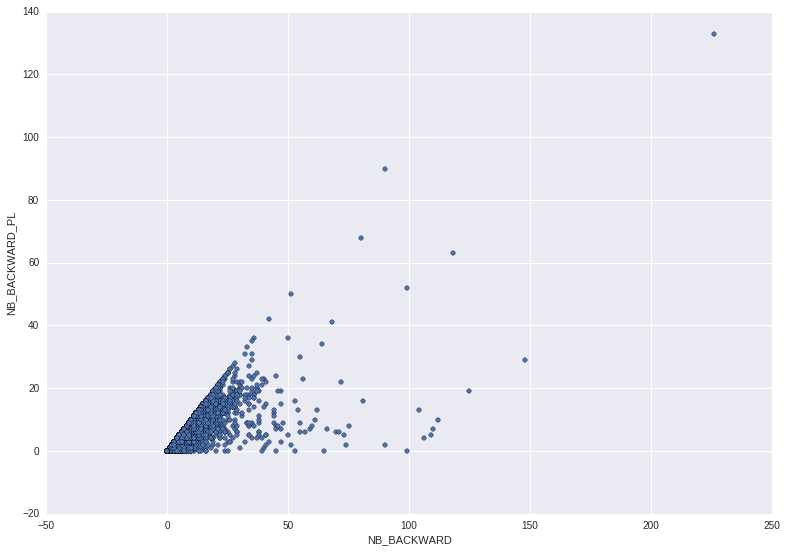

In [36]:
plt.figure(figsize=(13,9))
ax = plt.gca()
df_all0.plot(kind='scatter', x='NB_BACKWARD', y='NB_BACKWARD_PL', ax = ax)

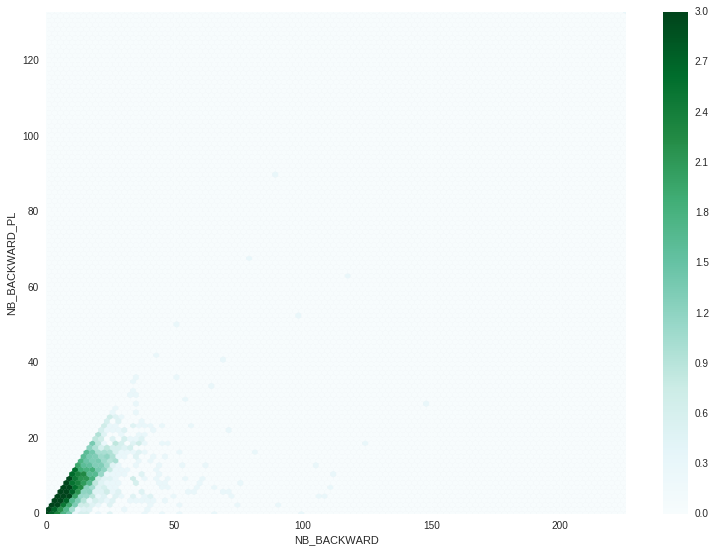

In [45]:
plt.figure(figsize=(13,9))
ax = plt.gca()
df_all0.plot(kind='hexbin', x='NB_BACKWARD', y='NB_BACKWARD_PL', gridsize=100, ax = ax, bins='log', vmax=3)


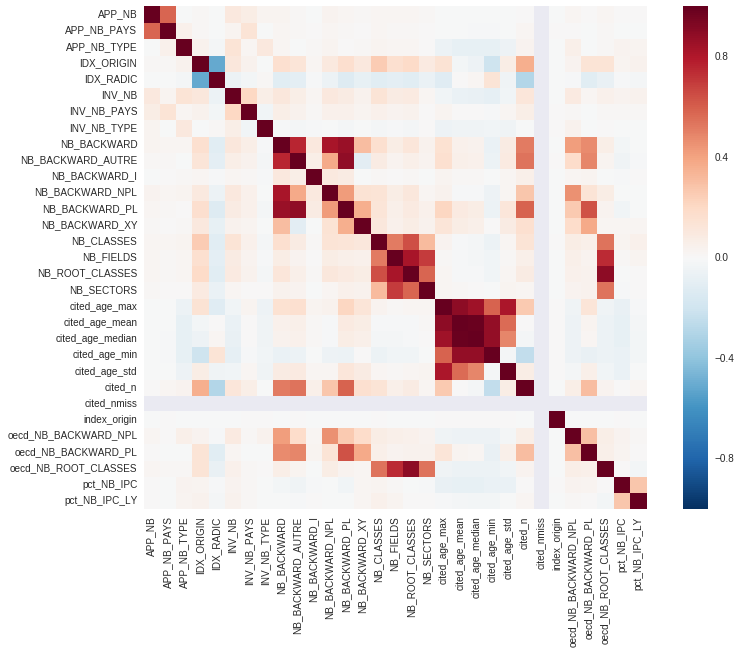

In [17]:
plt.figure(figsize=(13,9))
corr = df_all1.corr()
sns.heatmap(corr, square=True)

# resultats combinés avec le model Benchmark

In [3]:
df_all = import_data('data/train.csv', 'data/test.csv', 'VARIABLE_CIBLE', na_values='(MISSING)') 
df_all0 = df_all[df_all.SOURCE_CITED_AGE == 'IMPUT']
df_all1 = df_all[df_all.SOURCE_CITED_AGE == 'CALC']


date_columns = ['PRIORITY_MONTH', 'FILING_MONTH', 'PUBLICATION_MONTH', 'BEGIN_MONTH']

preproc = Preprocessings(date_columns=date_columns)

df0 = preproc.datetime_processings(df_all0, format='%m/%Y')
df0 = preproc.cat_to_codes(df0)
df0 = df0.fillna(df0.median())

preproc = Preprocessings(date_columns=date_columns)

df1 = preproc.datetime_processings(df_all1, format='%m/%Y')
df1 = preproc.cat_to_codes(df1)
df1 = df1.fillna(df1.median())


df0_train, df0_eval = re_split(df0, 'VARIABLE_CIBLE')
df1_train, df1_eval = re_split(df1, 'VARIABLE_CIBLE')

keep_feat = Used_features('VARIABLE_CIBLE')

print(df0_eval.shape, df0_train.shape)
df0_eval = keep_feat.fit_transform(df0_eval)
df0_train = keep_feat.transform(df0_train)
print(df0_eval.shape, df0_train.shape)

keep_feat = Used_features('VARIABLE_CIBLE')

print(df1_eval.shape, df1_train.shape)
df1_eval = keep_feat.fit_transform(df1_eval)
df1_train = keep_feat.transform(df1_train)
print(df1_eval.shape, df1_train.shape)

df_train0, df_test0 = train_test_split(df0_train, test_size=0.2, random_state=42)
df_train1, df_test1 = train_test_split(df1_train, test_size=0.2, random_state=42)

features0 = df0_eval.columns.tolist()
features0.remove('index_origin')
features1 = df1_eval.columns.tolist()
features1.remove('index_origin')

(84092, 48) (167692, 49)
(84092, 37) (167692, 38)
(45623, 48) (91739, 49)
(45623, 46) (91739, 47)


/home/maxime/local/anaconda3/lib/python3.4/site-packages/pandas/core/frame.py:2265: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


### modèle df0

In [4]:
print(df_train0.shape)

clf0 = RandomForestClassifier(n_estimators=1300, class_weight='balanced', 
                             min_samples_split=1, max_depth=None, n_jobs=6)

clf0.fit(df_train0[features0].values, df_train0.VARIABLE_CIBLE.values)

(134153, 38)


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=1,
            min_weight_fraction_leaf=0.0, n_estimators=1300, n_jobs=6,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [6]:
Y_proba0 = clf0.predict_proba(df_test0[features0].values)
roc_auc = roc_auc_score(df_test0.VARIABLE_CIBLE.values, Y_proba0[:,1])

print('score', roc_auc)

score 0.696329834611


### modèle df1

In [7]:
print(df_train1.shape)

clf1 = RandomForestClassifier(n_estimators=1405, class_weight='balanced', 
                             min_samples_split=1, max_depth=None, n_jobs=6)

clf1.fit(df_train1[features1].values, df_train1.VARIABLE_CIBLE.values)

(73391, 47)


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=1,
            min_weight_fraction_leaf=0.0, n_estimators=1405, n_jobs=6,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [8]:
Y_proba1 = clf1.predict_proba(df_test1[features1].values)
roc_auc = roc_auc_score(df_test1.VARIABLE_CIBLE.values, Y_proba1[:,1])

print('score', roc_auc)

score 0.691156521738


### Résultats du modèle combiné df0-df1

#### Résultats sur test set

In [16]:
df_test0['proba_c0'] = Y_proba0[:,0] 
df_test0['proba_c1'] = Y_proba0[:,1] 

df_test1['proba_c0'] = Y_proba1[:,0] 
df_test1['proba_c1'] = Y_proba1[:,1] 

cols = ['VARIABLE_CIBLE', 'proba_c0', 'proba_c1', 'index_origin']

df_test_res = pd.concat((df_test1[cols], df_test0[cols]), axis=0, ignore_index=True)

roc_au = roc_auc_score(df_test_res.VARIABLE_CIBLE.values, df_test_res.proba_c1.values)
print('total test score: ', roc_au)

/home/maxime/local/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/maxime/local/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/maxime/local/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

total test score:  0.695492131348


/home/maxime/local/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


#### résultats eval set

In [9]:
eval0_proba = clf0.predict_proba(df0_eval[features0].values)
eval1_proba = clf1.predict_proba(df1_eval[features1].values)

df0_eval['proba_c0'] = eval0_proba[:,0] 
df0_eval['proba_c1'] = eval0_proba[:,1] 

df1_eval['proba_c0'] = eval1_proba[:,0] 
df1_eval['proba_c1'] = eval1_proba[:,1] 

cols = ['proba_c0', 'proba_c1', 'index_origin']

df_eval_res = pd.concat((df0_eval[cols], df1_eval[cols]), axis=0, ignore_index=True)


,proba_c0,proba_c1,index_origin
0,0.403077,0.596923,1
1,0.766923,0.233077,2
2,0.186923,0.813077,3
3,0.550980,0.449020,4
4,0.785385,0.214615,7


In [10]:
df_eval_res = df_eval_res.sort_index(by='index_origin', ascending=True)

/home/maxime/local/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  if __name__ == '__main__':


,proba_c0,proba_c1,index_origin
84092,0.440569,0.559431,0
0,0.403077,0.596923,1
1,0.766923,0.233077,2
2,0.186923,0.813077,3
3,0.550980,0.449020,4


In [13]:

np.savetxt('y_pred1.txt', df_eval_res['proba_c0'].values, fmt='%s')

Après soumission du résultat en ligne : score 0.6973